# Integrals

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

---

# 0. Basics

### Example

Let's say you have a car, and you know it's going 25 miles per hour - how would you use that information to figure out how far the car had traveled?

--

---

# 1. Under the Curve Downtown...
- (is where I found that anti-derivative)

We've worked through a somewhat intuitive process, based on applying what seem to be the relevant rules for derivation, but working backwards while we did that. How can we solve for an integral without knowing the right anti-derivation rule(s) to apply?

Let's look again at what we just solved for above:
- $v(t) = 25$
- $p(t) = 25 * t + p_{0}$

And go ahead and visualize.

In [24]:
def v(t):
    return 25

In [25]:
def p(t, p0=0):
    return v(t) * t + p0

In [27]:
velocity = pd.Series([v(t) for t in range(10)], name="velocity")

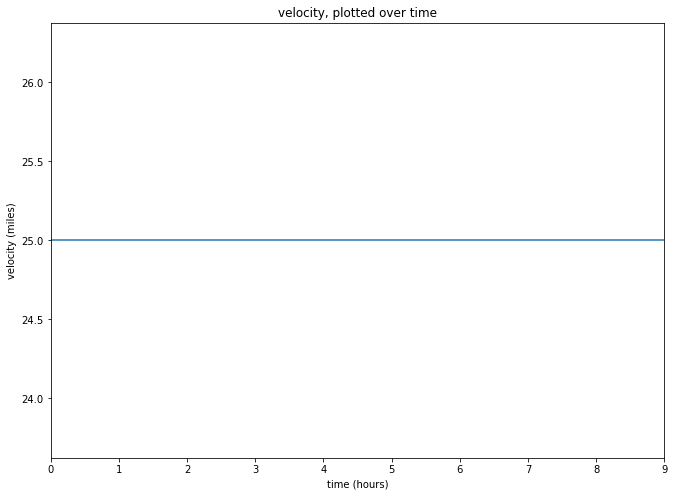

In [28]:
ax = velocity.plot(figsize=(11, 8))
xlab = ax.set_xlabel("time (hours)")
ylab = ax.set_ylabel("velocity (miles)")
title = ax.title.set_text("velocity, plotted over time")

So, _velocity_ is constant at `25`, nothing too exciting, right? Let's look deeper, and use some specific values:

In [32]:
p(3)

75

That tells us that our positition after `3 hours` is `75 miles` from where we started. Now, back to our _velocity_ plot:

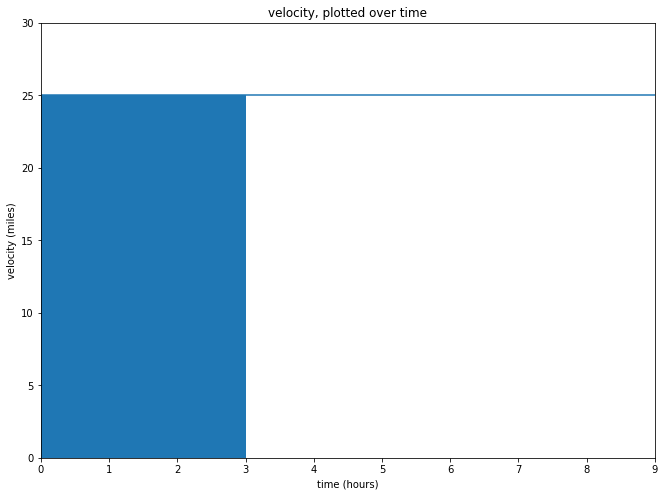

In [37]:
ax = velocity.plot(figsize=(11, 8))
xlab = ax.set_xlabel("time (hours)")
ylab = ax.set_ylabel("velocity (miles)")
title = ax.title.set_text("velocity, plotted over time")

vline = ax.fill_between((0, 3), (v(0), v(3)))
lim = ax.set_ylim(0, 30)

What if we solve for the area of the above rectangle, which is bounded by `[t, v(t)]` for $t \in {0, 3}$?

In [39]:
(v(3) - 0) * (3 - 0)

75

We get `p(3)`! In other words, the _area under a curve_ over a given region is equal to the anti-derivative of that function at the upper bound of that region. Now, there are some caveats, formalities, etc. that we can and should get into at a future point in time, but we can run with this as a baseline for now.

Let's now go ahead and say that, intead of _velocity_ being a constant `25`, it's _acceleration_ that's a constant `25` - how can we work up from here to get to position?

--

In [100]:
a = lambda t: 25

In [101]:
def v(t, v0=0):
    return 25 * t + v0

In [102]:
def p(t, v0=0, p0=0):
    return (25 / 2) * t ** 2 + v0 * t + p0

Now, let's plot _velocity_:

In [103]:
velocity = pd.Series([v(t) for t in range(10)], name="velocity")

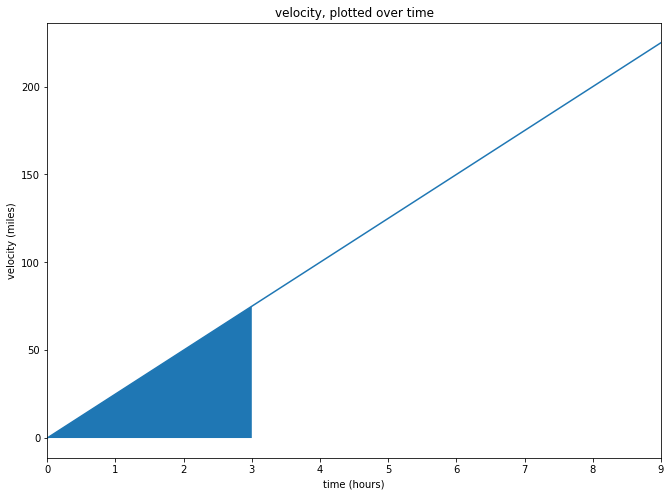

In [50]:
ax = velocity.plot(figsize=(11, 8))
xlab = ax.set_xlabel("time (hours)")
ylab = ax.set_ylabel("velocity (miles)")
title = ax.title.set_text("velocity, plotted over time")

vline = ax.fill_between((0, 3), (v(0), v(3)))

And, solving for `p(3)`:

In [52]:
p(3)

112.5

We find that it's equal to the area under the curve:

In [51]:
(1 / 2) * 3 * v(3)

112.5

So, that's all been pretty straightforward, as the are under a constant or linear function takes the shape of a rectangle or triangle, respectively, both of which have known area formulas. But what do we do when we're trying to take the area under something more complicated?

Let's say we wanted to integrate $p(t)$, which would give us (in the typical symbolism) $P(t)$ - what would that function look like?

--

Let's code this out, and then try to solve for the area under the curve:

In [88]:
def P(t, v0=0, p0=0, P0=0):
    return (25 / 6) * t ** 3 + (v0 / 2) * t ** 2 + p0 * t + P0

In [68]:
positions = pd.DataFrame([(t, p(t)) for t in np.linspace(0, 10, num=1000)], columns=["time", "position"]
                        ).set_index("time", drop=True)

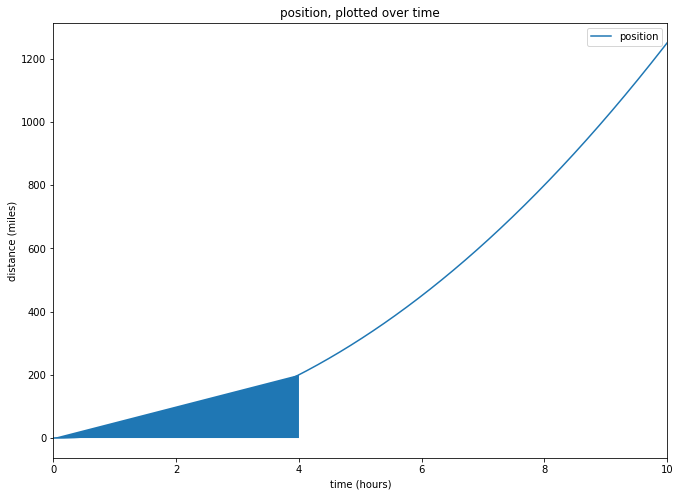

In [69]:
ax = positions.plot(figsize=(11, 8))
xlab = ax.set_xlabel("time (hours)")
ylab = ax.set_ylabel("distance (miles)")
title = ax.title.set_text("position, plotted over time")

vline = ax.fill_between((0, 4), (p(0), p(4)))

So, shitty pixelation issues (that make this line look straight) aside, we can see that we've got the base and height of a triangle, but with a curved hypotenous. How do we handle this?

Going back to what we discussed before, we _do_ know how to take the area of a rectangle, so what if we approximate this area what that of a rectangle with similar base and height?

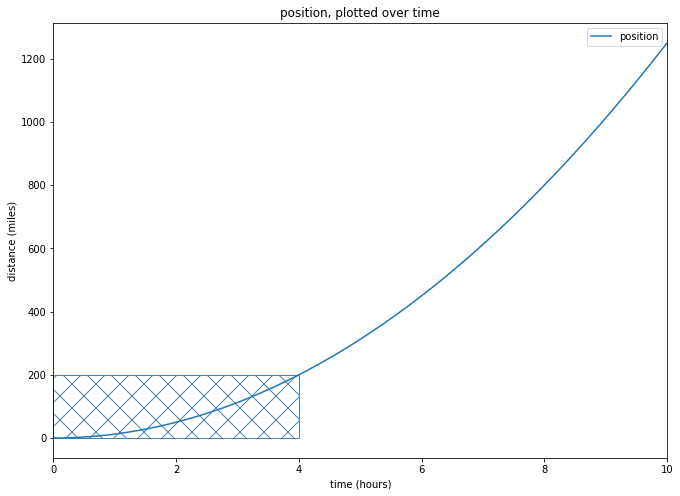

In [107]:
ax = positions.plot(figsize=(11, 8))
xlab = ax.set_xlabel("time (hours)")
ylab = ax.set_ylabel("distance (miles)")
title = ax.title.set_text("position, plotted over time")


vline = ax.fill_between((0, 4), (p(0), p(4)), 
                        step="pre",
                        hatch="x", edgecolor="steelblue", facecolor="white")

In [90]:
P(4)

266.6666666666667

In [108]:
p(4) * 4 

800.0

Ok, we are pretty far off. Any ideas on how to impove?

What if we go ahead and use _multiple_ rectangles, tying the top of each rectangle to a value of $p(t)$, so as to stop the rectangles from getting too high above our actual function's values:

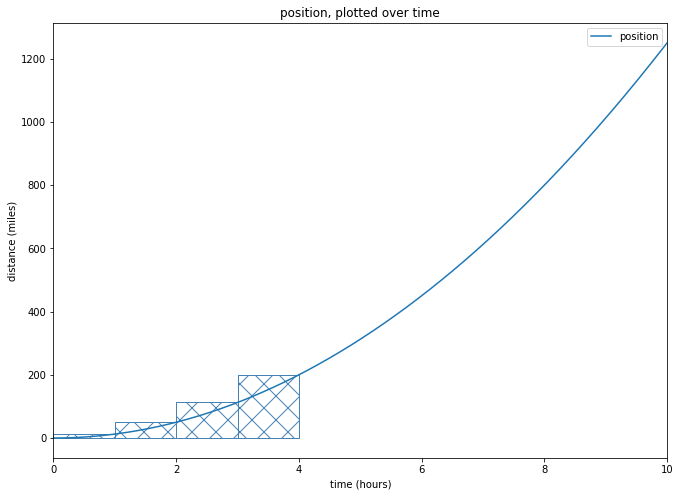

In [85]:
ax = positions.plot(figsize=(11, 8))
xlab = ax.set_xlabel("time (hours)")
ylab = ax.set_ylabel("distance (miles)")
title = ax.title.set_text("position, plotted over time")

for i in range(4):
    vline = ax.fill_between((i, i + 1), (p(i), p(i + 1)), 
                            step="pre",
                            hatch="x", edgecolor="steelblue", facecolor="white")

In [90]:
P(4)

266.6666666666667

In [95]:
sum([p(i+1) for i in range(4)])

375.0

Ok, so still not great, but much better than what we had before - shall we try again?

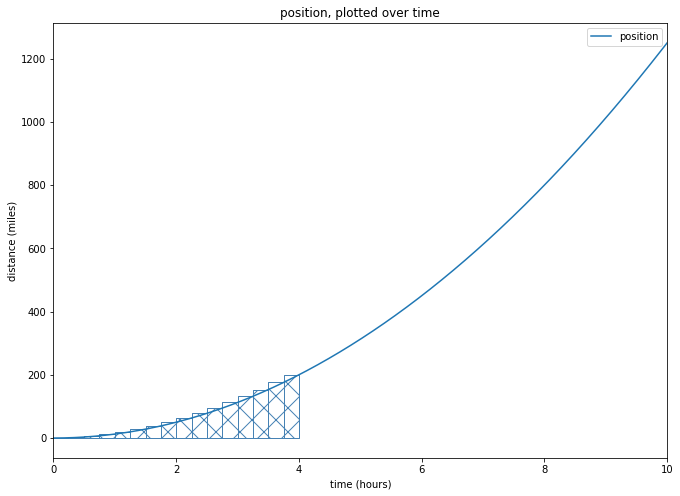

In [86]:
ax = positions.plot(figsize=(11, 8))
xlab = ax.set_xlabel("time (hours)")
ylab = ax.set_ylabel("distance (miles)")
title = ax.title.set_text("position, plotted over time")

for i in range(16):
    vline = ax.fill_between((i / 4, (i + 1)/4), (p(i / 4), p((i + 1)/4)), 
                            step="pre",
                            hatch="x", edgecolor="steelblue", facecolor="white")

In [90]:
P(4)

266.6666666666667

In [96]:
sum([p((i + 1)/4) * (1 / 4) for i in range(16)])

292.1875

Getting there!

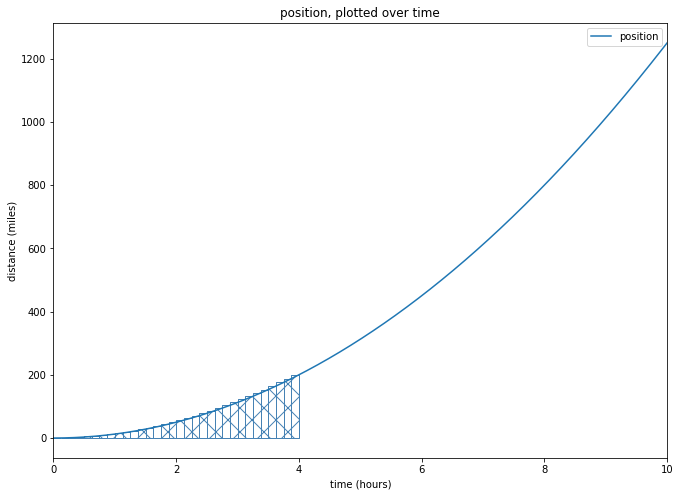

In [98]:
ax = positions.plot(figsize=(11, 8))
xlab = ax.set_xlabel("time (hours)")
ylab = ax.set_ylabel("distance (miles)")
title = ax.title.set_text("position, plotted over time")

for i in range(32):
    vline = ax.fill_between((i / 8, (i + 1)/8), (p(i / 8), p((i + 1)/8)), 
                            step="pre",
                            hatch="x", edgecolor="steelblue", facecolor="white")

In [90]:
P(4)

266.6666666666667

In [99]:
sum([p((i + 1)/8) * (1 / 8) for i in range(32)])

279.296875

One more time?

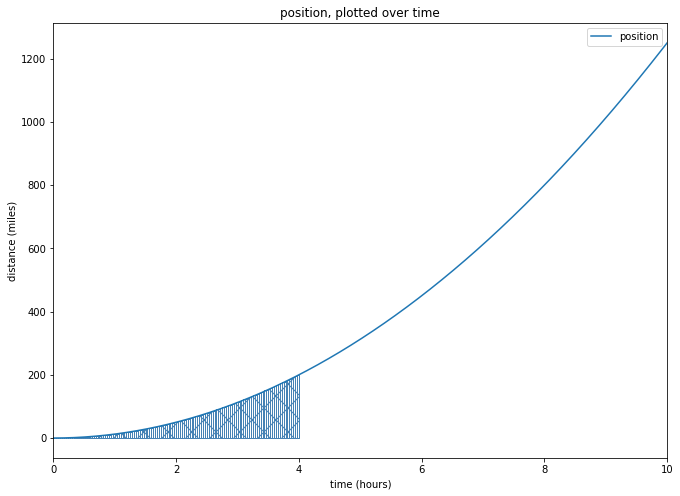

In [104]:
ax = positions.plot(figsize=(11, 8))
xlab = ax.set_xlabel("time (hours)")
ylab = ax.set_ylabel("distance (miles)")
title = ax.title.set_text("position, plotted over time")

for i in range(128):
    vline = ax.fill_between((i / 32, (i + 1)/32), (p(i / 32), p((i + 1)/32)), 
                            step="pre",
                            hatch="x", edgecolor="steelblue", facecolor="white")

In [105]:
P(4)

266.6666666666667

In [106]:
sum([p((i + 1)/32) * (1 / 32) for i in range(128)])

269.7998046875

In [109]:
269.7998046875 / 266.6666666666667

1.011749267578125

So we are now putting forth an approximation that's close to 99% accuracte. In fact, as we let the widths of our rectangles approach 0, our area apporoximation will continue to get closer to the actual value.